In [699]:
import json
import requests
import omdb
import sqlite3
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
omdb.set_default('apikey', "4c4a2cf8")

In [141]:
results = omdb.get(title=str("""Twilight"""))
books = pd.read_csv('books.csv')


{'title': 'Twilight',
 'year': '2008',
 'rated': 'PG-13',
 'released': '21 Nov 2008',
 'runtime': '122 min',
 'genre': 'Drama, Fantasy, Romance',
 'director': 'Catherine Hardwicke',
 'writer': 'Melissa Rosenberg (screenplay), Stephenie Meyer (novel)',
 'actors': 'Kristen Stewart, Sarah Clarke, Matt Bushell, Billy Burke',
 'plot': 'Bella Swan moves to Forks and encounters Edward Cullen, a gorgeous boy with a secret.',
 'language': 'English',
 'country': 'USA',
 'awards': '29 wins & 15 nominations.',
 'poster': 'https://m.media-amazon.com/images/M/MV5BMTQ2NzUxMTAxN15BMl5BanBnXkFtZTcwMzEyMTIwMg@@._V1_SX300.jpg',
 'ratings': [{'source': 'Internet Movie Database', 'value': '5.2/10'},
  {'source': 'Rotten Tomatoes', 'value': '49%'},
  {'source': 'Metacritic', 'value': '56/100'}],
 'metascore': '56',
 'imdb_rating': '5.2',
 'imdb_votes': '391,002',
 'imdb_id': 'tt1099212',
 'type': 'movie',
 'dvd': '21 Mar 2009',
 'box_office': '$191,449,475',
 'production': 'Summit Entertainment',
 'website'

In [236]:
list_titles_cleaned = []
for title in books.title:
    y = re.sub(r'\(.*\)', '', title).strip()
    list_titles_cleaned.append(y)
# eliminate perentheses at the end of titles
len(list_titles_cleaned)

10000

In [237]:
list_feature_length = []
for title in list_titles_cleaned:
    results = omdb.get(title=str(title))
    if title not in list_feature_length:
        try:
            runtime = results['runtime']
            typex = results['type']
            runtime_int = int(runtime.strip(' min'))
            if (runtime_int > 60):
                if (typex == 'movie'):
                    list_feature_length.append(title)
        except:
            continue
# making a list from only the titles that return feature length films
# Ok this took frickin forever so next time im just going to create a huge 
# DF and just filter it down instead of making repeated requests

In [238]:
len(list_feature_length)

2625

In [239]:
movie_dict = {
    'query' : [],
    'title' : [],
    'year' : [],
    'RT' : [],
    'Metacritic' : [],
    'IMDB' : []
}

for query in list_feature_length:
    movie_dict['query'].append(query)
    results = omdb.get(title=str(query))
    
    try:
        title = results['title']
        movie_dict['title'].append(title)
    except:
        title = 'none'
        movie_dict['title'].append(title)
        
    try:
        year = results['year']
        movie_dict['year'].append(year)
    except:
        year = 0
        movie_dict['year'].append(year)
        
    exister = False
    for dicty in results['ratings']:
        if dicty['source'] == "Rotten Tomatoes":
            RT_val = dicty['value']
            movie_dict['RT'].append(RT_val)
            exister = True
    if exister == False:
        RT_def = 'none'
        movie_dict['RT'].append(RT_def)

    try:
        metacritic = results['metascore']
        movie_dict['Metacritic'].append(metacritic)
    except:
        metacritic = 'none'
        movie_dict['Metacritic'].append(metacritic)
        
    try:
        IMDB = results['imdb_rating']
        movie_dict['IMDB'].append(IMDB)
    except:
        metacritic = 'none'
        movie_dict['IMDB'].append(IMDB)
# creating a dictionary that using the OMDB API

In [544]:
movies_master = pd.DataFrame(movie_dict)
movies_master = movies_master.rename(columns={'title': 'movie_title', 'year': 'movie_year', 'query': 'title'})
movies_master
# creating a DF from that dictionary

,title,movie_title,movie_year,RT,Metacritic,IMDB
0,The Hunger Games,The Hunger Games,2012,84%,68,7.2
1,Harry Potter and the Sorcerer's Stone,Harry Potter and the Sorcerer's Stone,2001,81%,64,7.6
2,Twilight,Twilight,2008,49%,56,5.2
3,To Kill a Mockingbird,To Kill a Mockingbird,1962,91%,87,8.3
4,The Great Gatsby,The Great Gatsby,2013,48%,55,7.3
5,The Fault in Our Stars,The Fault in Our Stars,2014,81%,69,7.7
6,The Hobbit,The Hobbit,1977,67%,N/A,6.8
7,The Catcher in the Rye,The Catcher in the Rye,2008,none,N/A,2.1
8,Angels & Demons,Angels & Demons,2009,37%,48,6.7
9,The Kite Runner,The Kite Runner,2007,66%,61,7.6


In [350]:
books_info = books.filter(['title', 'original_publication_year', 'average_rating'])
def subber(thing):
    stringy = re.sub(r'\(.*\)', '', thing).strip()
    return(stringy)
books_info.title = books_info.title.apply(subber)
books_info.average_rating = books_info.average_rating.apply(lambda x: x*20)
# making a new books DF with only the columns I need

In [351]:
master_frame = movies_master.merge(books_info, on = 'title', how = 'left')
# merging the frames and preparing for cleaning

In [352]:
master_frame.movie_year = master_frame.movie_year.apply(lambda x: int(x))
master_frame = master_frame[master_frame.movie_year > master_frame.original_publication_year]
# filtering if book is older than movie

In [431]:
master_frame['title_length'] = master_frame.title.str.len()

In [636]:
nine_or_less = master_frame[master_frame.title_length < 10]
more_than_nine = master_frame[master_frame.title_length > 9]
nine_cleaned = nine_or_less[nine_or_less.title == nine_or_less.movie_title]
frames = [nine_cleaned, more_than_nine]
master_cleaned = pd.concat(frames)
# filtering if a title less long than 9 chars does not exactly match its movie
# this si done to avoid false movies returning for books

In [637]:
def stripper(row):
    if row == 'none':
        return('none')
    elif type(row) == str:
        new = row.strip('%')
        integer = int(new)
        return(integer)
master_cleaned.RT = master_cleaned.RT.apply(stripper)
# turning the rotten tomatoes score into integers
# CAN ONLY RUN ONCE!

In [638]:
def converter_met(row):
    if row == 'N/A':
        return('none')
    elif type(row) == str:
        integer = int(row)
        return(integer)
master_cleaned.Metacritic = master_cleaned.Metacritic.apply(converter_met)
# turning the Metacritic score into integers
# CAN ONLY RUN ONCE!

In [639]:
def converter_imdb(row):
    if row == 'N/A':
        return('none')
    elif type(row) == str:
        integer = float(row)
        mult = integer*10
        return(mult)
master_cleaned.IMDB = master_cleaned.IMDB.apply(converter_imdb)
# turning the IMDB scores into integers

In [640]:
master_cleaned['all_is_none'] = ((master_cleaned.RT == master_cleaned.Metacritic) 
                                 & (master_cleaned.Metacritic == master_cleaned.IMDB))
master_cleaned = master_cleaned[master_cleaned.all_is_none == False]
# dropping the row is all the movie scores = none

In [641]:
def nonefier(row):
    if row == 'none':
        return(None)
    else:
        return(row)

master_cleaned.RT = master_cleaned.RT.apply(nonefier)
master_cleaned.Metacritic = master_cleaned.Metacritic.apply(nonefier)
master_cleaned.IMDB = master_cleaned.IMDB.apply(nonefier)

# making it easier to average the stuff out by 

In [642]:
master_cleaned['avg_movie_rating'] = master_cleaned[['RT', 'Metacritic', 'IMDB']].mean(axis=1).round(decimals = 1)
master_cleaned

,title,movie_title,movie_year,RT,Metacritic,IMDB,original_publication_year,average_rating,title_length,all_is_none,avg_movie_rating
2,Twilight,Twilight,2008,49.0,56.0,52.0,2005.0,71.4,8,False,52.3
3,Twilight,Twilight,2008,49.0,56.0,52.0,2005.0,85.2,8,False,52.3
4,Twilight,Twilight,2008,49.0,56.0,52.0,2006.0,86.0,8,False,52.3
12,Divergent,Divergent,2014,42.0,48.0,67.0,2011.0,84.8,9,False,52.3
13,1984,1984,1984,82.0,67.0,72.0,1949.0,82.8,4,False,73.7
29,Gone Girl,Gone Girl,2014,87.0,79.0,81.0,2012.0,80.6,9,False,82.3
30,The Help,The Help,2011,76.0,62.0,81.0,2009.0,89.0,8,False,73.0
35,The Giver,The Giver,2014,35.0,47.0,65.0,1993.0,82.4,9,False,49.0
41,Jane Eyre,Jane Eyre,2011,84.0,76.0,74.0,1847.0,82.0,9,False,78.0
52,Eragon,Eragon,2006,NaN,38.0,51.0,2002.0,77.2,6,False,44.5


In [643]:
master_cleaned = master_cleaned.groupby('title').mean().reset_index()
# averaging identical editions of a book

In [644]:
mr_clean = master_cleaned.drop([1746])
# dropping the one wierd arabic result that somehow passed the API
# mr clean is the cleanest

In [645]:
mr_clean

,title,movie_year,RT,Metacritic,IMDB,original_publication_year,average_rating,title_length,all_is_none,avg_movie_rating
0,'Salem's Lot,1979,88.0,NaN,68.0,1975.0,79.8,12,False,78.0
1,1421: The Year China Discovered America,2004,NaN,NaN,65.0,2002.0,71.6,39,False,65.0
2,1984,1984,82.0,67.0,72.0,1949.0,82.8,4,False,73.7
3,1st to Die,2003,NaN,NaN,57.0,2001.0,81.0,10,False,57.0
4,300,2006,60.0,52.0,77.0,1998.0,78.6,3,False,63.0
5,4:50 from Paddington,1987,NaN,NaN,77.0,1957.0,78.4,20,False,77.0
6,5 cm,2012,NaN,NaN,72.0,2005.0,76.8,4,False,72.0
7,"84, Charing Cross Road",1987,87.0,NaN,75.0,1970.0,83.8,22,False,81.0
8,A Beautiful Mind,2001,74.0,72.0,82.0,1998.0,82.4,16,False,76.0
9,A Bridge Too Far,1977,62.0,NaN,74.0,1974.0,84.8,16,False,68.0


In [763]:
mr_clean['difference'] = mr_clean['average_rating'] - mr_clean ['avg_movie_rating']
mr_clean['slightly worse'] = ((0.0 < mr_clean.difference) & (mr_clean.difference <= 10.0)).astype(int)
mr_clean['much worse']= (mr_clean.difference > 10.0).astype(int)
mr_clean['slightly better'] = ((0.0 >= mr_clean.difference) & (mr_clean.difference >= -10.0)).astype(int)
mr_clean['much better'] = (mr_clean.difference < -10.0).astype(int)

mr_clean
#making the variables to graph

,title,movie_year,RT,Metacritic,IMDB,original_publication_year,average_rating,title_length,all_is_none,avg_movie_rating,difference,slightly worse,much worse,slightly better,much better
0,'Salem's Lot,1979,88.0,NaN,68.0,1975.0,79.8,12,False,78.0,1.8,1,0,0,0
1,1421: The Year China Discovered America,2004,NaN,NaN,65.0,2002.0,71.6,39,False,65.0,6.6,1,0,0,0
2,1984,1984,82.0,67.0,72.0,1949.0,82.8,4,False,73.7,9.1,1,0,0,0
3,1st to Die,2003,NaN,NaN,57.0,2001.0,81.0,10,False,57.0,24.0,0,1,0,0
4,300,2006,60.0,52.0,77.0,1998.0,78.6,3,False,63.0,15.6,0,1,0,0
5,4:50 from Paddington,1987,NaN,NaN,77.0,1957.0,78.4,20,False,77.0,1.4,1,0,0,0
6,5 cm,2012,NaN,NaN,72.0,2005.0,76.8,4,False,72.0,4.8,1,0,0,0
7,"84, Charing Cross Road",1987,87.0,NaN,75.0,1970.0,83.8,22,False,81.0,2.8,1,0,0,0
8,A Beautiful Mind,2001,74.0,72.0,82.0,1998.0,82.4,16,False,76.0,6.4,1,0,0,0
9,A Bridge Too Far,1977,62.0,NaN,74.0,1974.0,84.8,16,False,68.0,16.8,0,1,0,0


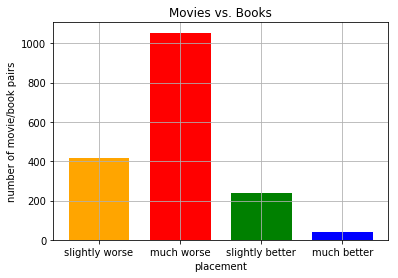

In [768]:
fig, ax = plt.subplots()
N = 1
width = 0.60
ind = np.arange(N)

p1 = ax.bar(ind, mr_clean['slightly worse'].sum(), width, color='orange')
p2 = ax.bar(ind + width + .2, mr_clean['much worse'].sum(), width, color='red')
p3 = ax.bar(ind + (width * 2) +.4, mr_clean['slightly better'].sum(), width, color='green')
p4 = ax.bar(ind + (width * 3) + .6, mr_clean['much better'].sum(), width, color='blue')

ax.set_xticks([ind, ind + width + .2, ind + width * 2 + .4, ind + width * 3 + .6])
ax.set_xticklabels(("slightly worse", "much worse", "slightly better", "much better")) 

ax.set(xlabel='placement', ylabel = 'number of movie/book pairs', title="Movies vs. Books")

fig.savefig('movies_bar.png')

ax.grid()

plt.show()